# 6-1. イメージで理解する感染症モデル
## SIR モデル
感染症の予測を行なうための基本となるモデル（微分方程式）。
- Susceptible: 感受性保持者
- Infected: 感染者
- Recovered(or Removed): 免疫保持者（あるいは隔離者）

の頭文字から命名

In [2]:
# 微分方程式の Source-code の構造
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameter設定
dt = 1.0
beta = 0.000003
gamma = 0.1
S = 200000
I = 2
R = 0
alpha = I / (S + I +R)
num = 100

In [4]:
# 初期化（初期値設定）
inf = np.zeros(num)
sus = np.zeros(num)
rec = np.zeros(num)
inf[0] = I
sus[0] = S
rec[0] = R

In [5]:
# 時間発展方式
for t in range(1, num):
    # 時刻 t-1 から t への変化分の計算
    S = sus[t - 1]
    I = inf[t - 1]
    R = rec[t - 1]
    alpha = I / (S + I + R)
    delta_R = I * gamma
    delta_S = -beta * S * I
    if delta_S > 0:
        delta_S = 0
    delta_I = -delta_S - delta_R
    # 時刻 t での値で計算
    I = I + delta_I * dt
    R = R + delta_R * dt
    S = S + delta_S * dt
    if S <0:
        s = 0
    sus[t] = S
    inf[t] = I
    rec[t] = R

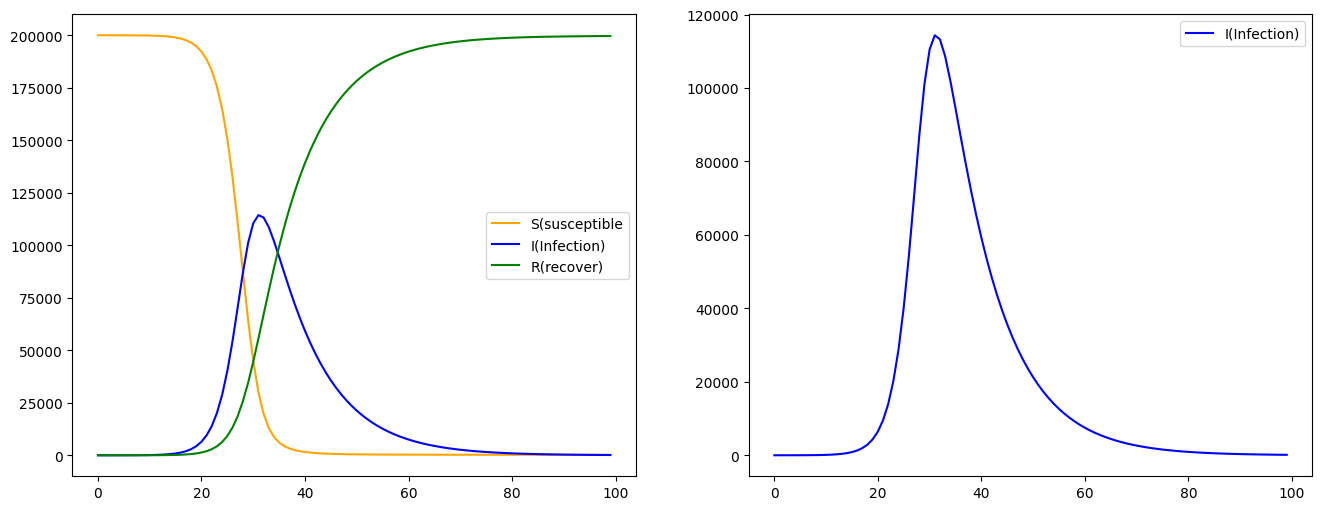

In [7]:
# Graph描画
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(sus, label='S(susceptible', color='orange')
plt.plot(inf, label='I(Infection)', color='blue')
plt.plot(rec, label='R(recover)', color='green')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(inf, label='I(Infection)', color='blue')
plt.legend()

初期値が時間発展方程式に従って for loop で更新していけば、時刻 t の状況が予測できることになる。

SIR-model を元に微分方程式、そして数値シミュレーションを使いこなすまでに至るには、やや複雑。

微分方程式の最も単純なものである **「ねずみ算」** から理解を深めていく。